Konu: Abalone: Bu veri setini kullanarak deniz kulaklarının yaşını tahmin eden 
modelleri geliştiriniz. Veri seti 8 bağımsız ve 1 bağımlı değişkenden 
oluşmaktadır. 

Algoritmalar: 
DTR
SVR 
KKNR

# Kütüphanelerin Eklenmesi

* Gerekli kütüphaneleri eklediğimiz kısım 

In [116]:
# Temel kütüphaneleri yükleme
# Gerekli kütüphaneleri içeri aktarın
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR #SVR modeli 
from sklearn.model_selection import cross_val_score

%matplotlib inline


# Verinin Okunması

* Burada dosya yolunu ekledim, dosyayı okuttum. Bu kısmın amacı şudur.... 

In [117]:
# Veri setini pandas ile yükleyin
url = "data\\abalone.data" #burada dosya yolunu ekledi 
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Age"]
data = pd.read_csv(url, header=None, names=column_names)

# Veri setinin ilk 5 satırını gösterin
data.head()

# Veri seti hakkında bilgi
print("\nVeri Seti Hakkında Bilgi:")
data.info()

print("Veri Setinin İlk 5 Satırı:")
display(data.head())  # İlk 5 veriyi görüntüleme

print("\n Sütunlar ve veri türleri")
print(data.dtypes)


Veri Seti Hakkında Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Age            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
Veri Setinin İlk 5 Satırı:


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



 Sütunlar ve veri türleri
Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Age                int64
dtype: object


* Eksik değer kontrolü

In [118]:
# Eksik veriyi kontrol et
print(data.isnull().sum())

# Kategorik veriyi sayısala dönüştür
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Age              0
dtype: int64


* Kategorik Değişken Dönüşümü 

In [119]:
# Kategorik veriyi sayısala dönüştürme

# 'Age' sütununu 'Rings' olarak değiştirelim
data.rename(columns={'Age': 'Rings'}, inplace=True)

# 'Rings' sütununu integer olarak ayarlayalım
data["Rings"] = data["Rings"].astype(int)
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# 'Sex' sütununu kategorik veri olarak OneHotEncoding ile dönüştürme
data = pd.get_dummies(data, columns=["Sex"], drop_first=True)  # 'Sex' sütununu sayısal hale getirir

# Hedef değişken 'Rings' integer olarak kullanılacak (Regresyon için uygun)
data["Rings"] = data["Rings"].astype(int)

# Değişikliklerden sonra veri türlerini kontrol etme
print("Güncellenmiş veri türleri:")
print(data.dtypes)

Güncellenmiş veri türleri:
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object


# Önişlem Yapılması

In [120]:
# Bağımsız değişkenler (tüm ilk 8 sütun)
x = data.iloc[:, 0:8]  # Sütunlar 0'dan 7'ye kadar (ilk 8 sütun)
print("Bağımsız Değişkenler (X) Sütunları:", x.columns)

# Bağımlı değişken (Rings sütunu)
y = data['Rings']  # Tahmin edilecek hedef değişken (Rings)
print("\nBağımlı Değişken (Y): Rings")

# Veri boyutlarını kontrol etme
print("\nBağımsız Değişken Boyutu (X):", x.shape)
print("\nBağımlı Değişken Boyutu (Y):", y.shape)

# İlk 5 satırı görüntüleme
print("\nBağımsız Değişkenler (X):")
display(x.head())

print("\nBağımlı Değişken (Y):")
display(y.head())


Bağımsız Değişkenler (X) Sütunları: Index(['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

Bağımlı Değişken (Y): Rings

Bağımsız Değişken Boyutu (X): (4177, 8)

Bağımlı Değişken Boyutu (Y): (4177,)

Bağımsız Değişkenler (X):


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



Bağımlı Değişken (Y):


0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Eğitim ve Test Setlerine Ayrılması

* 0.2 veya 0.3 ile ayırmanın daha sağlıklı olacağı düşünüyorum. Bu dengeyi sağlamalıyız. Sağlamadığımız durumunda model az veri seti ile öğrenirse öğrenme yeterli gelmeyecektir; az test verisi de modeli test etmemiz için yeterli olmayacaktır ve modelin performansı hakkında yeterince bilgiye sahip olamayız.

In [121]:
# Veriye rastgele bir gürültü ekleyerek hedef değişkeni karmaşıklaştırma
# Bunu buraya aşırı öğrenmeyi engellemek için ekledik 
np.random.seed(42)
y_noisy = y + np.random.normal(0, 0.5, size=y.shape) 

#Ben %70 eğitim - %30 test verisi olarak ayıracağım fakat %80 eğitim - %20 test şeklinde de bölünebilir
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)

# Veri bölünmesi sonrası boyutlar
print("\nEğitim ve Test Verilerinin Boyutları:")
print(f"X_train: {x_train.shape}, X_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Eğitim ve Test Verilerinin Boyutları:
X_train: (2923, 8), X_test: (1254, 8)
y_train: (2923,), y_test: (1254,)


## Veri Ölçeklendirme/ Normalizasyon

In [122]:
# Veri Normalizasyonu/Ölçeklendirme
scaler = StandardScaler()

# Eğitim ve test verilerini normalize etme
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Normalize edilmiş veri boyutlarını kontrol etme
print("\nNormalize Edilmiş Eğitim ve Test Verilerinin Boyutları:")
print(f"x_train_scaled: {x_train_scaled.shape}, x_test_scaled: {x_test_scaled.shape}")


Normalize Edilmiş Eğitim ve Test Verilerinin Boyutları:
x_train_scaled: (2923, 8), x_test_scaled: (1254, 8)


#  Modellenin Eğitilmesi 

- DTR 

In [123]:
# Karar Ağacı Regresyonu Modeli
DTR_model = DecisionTreeRegressor(
    max_depth=3,               # Ağacın maksimum derinliği (5'le sınırladık)
    min_samples_split=15,      # Bölünme için minimum 10 örnek gerekli
    random_state=42,
    min_samples_leaf=5,        # Yaprak düğümde minimum 5 örnek
)
DTR_model.fit(x_train_scaled, y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=15,
                      random_state=42)

- LR

SVR

In [124]:
SVR_model = SVR(kernel='rbf')
SVR_model.fit(x_train_scaled, y_train)

SVR()

- KNNR

In [125]:
KNNR_model = KNeighborsRegressor(n_neighbors=5)
KNNR_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

# Sonuçların Sunumu 

In [126]:
# Karar Ağacı Regresyonu Tahminler
dtr_train_predictions = DTR_model.predict(x_train_scaled)
dtr_test_predictions = DTR_model.predict(x_test_scaled)

# Performans Değerlendirmesi (Eğitim Seti)
print("\nKarar Ağacı Regresyonu (DTR) - Eğitim Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_train, dtr_train_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_train, dtr_train_predictions):.3f}")
print(f"R^2: {r2_score(y_train, dtr_train_predictions):.3f}")

# Performans Değerlendirmesi (Test Seti)
print("\nKarar Ağacı Regresyonu (DTR) - Test Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_test, dtr_test_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_test, dtr_test_predictions):.3f}")
print(f"R^2: {r2_score(y_test, dtr_test_predictions):.3f}")



Karar Ağacı Regresyonu (DTR) - Eğitim Seti Performansı:
MAE: 0.475
MSE: 0.380
R^2: 0.964

Karar Ağacı Regresyonu (DTR) - Test Seti Performansı:
MAE: 0.459
MSE: 0.306
R^2: 0.970


In [127]:
# SVR Tahminler
svr_train_predictions = SVR_model.predict(x_train_scaled)
svr_test_predictions = SVR_model.predict(x_test_scaled)

# Performans Değerlendirmesi (Eğitim Seti)
print("\nDestek Vektör Regresyonu (SVR) - Eğitim Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_train, svr_train_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_train, svr_train_predictions):.3f}")
print(f"R^2: {r2_score(y_train, svr_train_predictions):.3f}")

# Performans Değerlendirmesi (Test Seti)
print("\nDestek Vektör Regresyonu (SVR) - Test Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_test, svr_test_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_test, svr_test_predictions):.3f}")
print(f"R^2: {r2_score(y_test, svr_test_predictions):.3f}")



Destek Vektör Regresyonu (SVR) - Eğitim Seti Performansı:
MAE: 0.087
MSE: 0.125
R^2: 0.988

Destek Vektör Regresyonu (SVR) - Test Seti Performansı:
MAE: 0.093
MSE: 0.086
R^2: 0.992


In [128]:
# KNN Regresyonu Tahminler
knnr_train_predictions = KNNR_model.predict(x_train_scaled)
knnr_test_predictions = KNNR_model.predict(x_test_scaled)

# Performans Değerlendirmesi (Eğitim Seti)
print("\nKNN Regresyonu (KNNR) - Eğitim Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_train, knnr_train_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_train, knnr_train_predictions):.3f}")
print(f"R^2: {r2_score(y_train, knnr_train_predictions):.3f}")

# Performans Değerlendirmesi (Test Seti)
print("\nKNN Regresyonu (KNNR) - Test Seti Performansı:")
print(f"MAE: {mean_absolute_error(y_test, knnr_test_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_test, knnr_test_predictions):.3f}")
print(f"R^2: {r2_score(y_test, knnr_test_predictions):.3f}")



KNN Regresyonu (KNNR) - Eğitim Seti Performansı:
MAE: 0.160
MSE: 0.102
R^2: 0.990

KNN Regresyonu (KNNR) - Test Seti Performansı:
MAE: 0.198
MSE: 0.140
R^2: 0.986


## Çapraz Doğrulama

In [129]:
# Destek Vektör Regresyonu (SVR) için Çapraz Doğrulama
svr_cv_scores = cross_val_score(SVR_model, x_train_scaled, y_train, cv=5, scoring='r2')
print("\nDestek Vektör Regresyonu (SVR) Çapraz Doğrulama Sonuçları:")
print(f"Her Katman R²: {svr_cv_scores}")
print(f"Ortalama R²: {svr_cv_scores.mean():.3f}")

# KNN Regresyonu için Çapraz Doğrulama
knnr_cv_scores = cross_val_score(KNNR_model, x_train_scaled, y_train, cv=5, scoring='r2')
print("\nKNN Regresyonu (KNNR) Çapraz Doğrulama Sonuçları:")
print(f"Her Katman R²: {knnr_cv_scores}")
print(f"Ortalama R²: {knnr_cv_scores.mean():.3f}")

# Karar Ağacı Regresyonu (DTR) için Çapraz Doğrulama
dtr_cv_scores = cross_val_score(DTR_model, x_train_scaled, y_train, cv=5, scoring='r2')
print("\nKarar Ağacı Regresyonu (DTR) Çapraz Doğrulama Sonuçları:")
print(f"Her Katman R²: {dtr_cv_scores}")
print(f"Ortalama R²: {dtr_cv_scores.mean():.3f}")


Destek Vektör Regresyonu (SVR) Çapraz Doğrulama Sonuçları:
Her Katman R²: [0.97565936 0.99174617 0.96315825 0.98882377 0.99816749]
Ortalama R²: 0.984

KNN Regresyonu (KNNR) Çapraz Doğrulama Sonuçları:
Her Katman R²: [0.98341439 0.98566181 0.97508875 0.98569829 0.98645163]
Ortalama R²: 0.983

Karar Ağacı Regresyonu (DTR) Çapraz Doğrulama Sonuçları:
Her Katman R²: [0.95927664 0.96401614 0.95863041 0.96608657 0.96391833]
Ortalama R²: 0.962


# Görselleştirme

- Modellerin ayrı ayrı performanslarını gösterdiğimiz grafikler çizdiriyorum sonrasında bütün modellerin hepsini karşılaştırdığımız grafikle görselleştirmeyi bitirdik. 

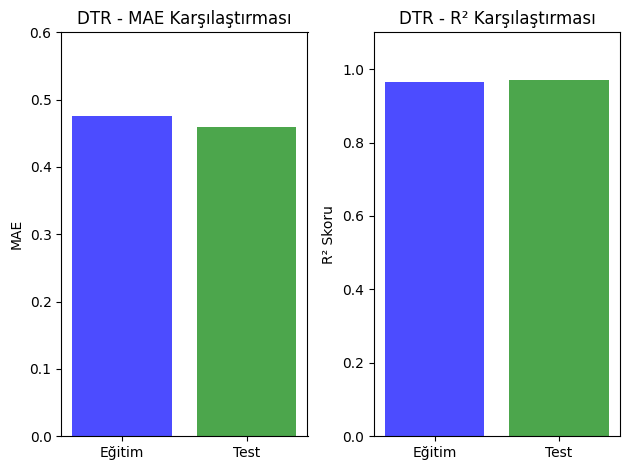

In [130]:
# MAE Grafiği
plt.subplot(1, 2, 1)
plt.bar(['Eğitim', 'Test'], [0.475, 0.459], color=['blue', 'green'], alpha=0.7)
plt.title('DTR - MAE Karşılaştırması')
plt.ylabel('MAE')
plt.ylim(0, 0.6)

# R² Grafiği
plt.subplot(1, 2, 2)
plt.bar(['Eğitim', 'Test'], [0.964, 0.970], color=['blue', 'green'], alpha=0.7)
plt.title('DTR - R² Karşılaştırması')
plt.ylabel('R² Skoru')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()


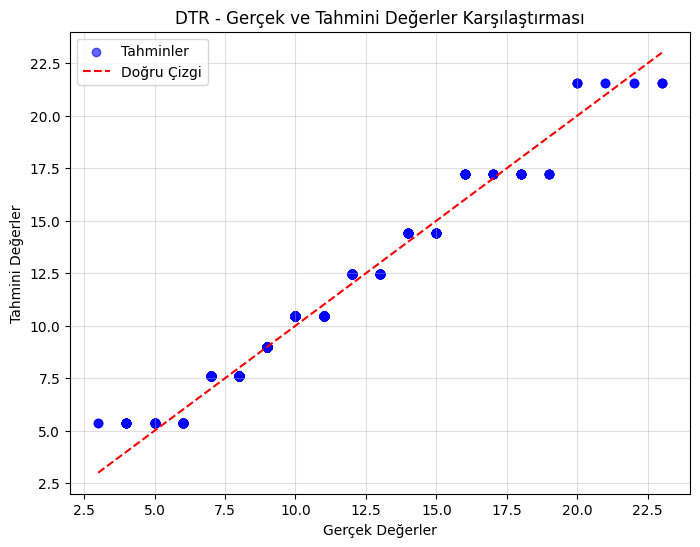

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dtr_test_predictions, color='blue', alpha=0.6, label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Doğru Çizgi')
plt.title('DTR - Gerçek ve Tahmini Değerler Karşılaştırması')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

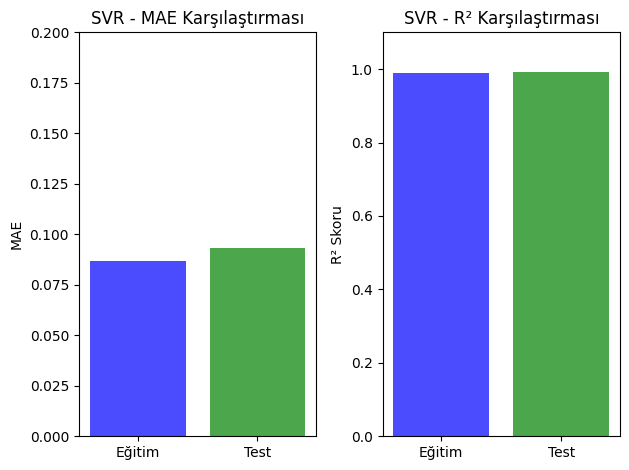

In [132]:
# MAE Grafiği
plt.subplot(1, 2, 1)
plt.bar(['Eğitim', 'Test'], [0.087, 0.093], color=['blue', 'green'], alpha=0.7)
plt.title('SVR - MAE Karşılaştırması')
plt.ylabel('MAE')
plt.ylim(0, 0.2)

# R² Grafiği
plt.subplot(1, 2, 2)
plt.bar(['Eğitim', 'Test'], [0.988, 0.992], color=['blue', 'green'], alpha=0.7)
plt.title('SVR - R² Karşılaştırması')
plt.ylabel('R² Skoru')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

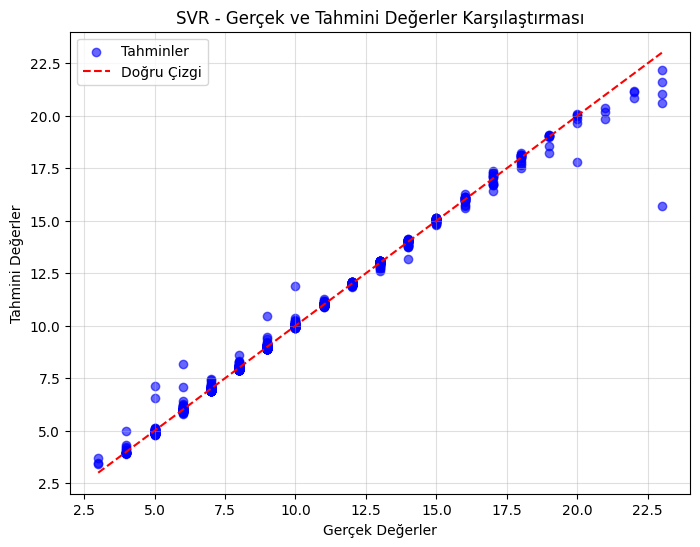

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_test_predictions, color='blue', alpha=0.6, label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Doğru Çizgi')
plt.title('SVR - Gerçek ve Tahmini Değerler Karşılaştırması')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

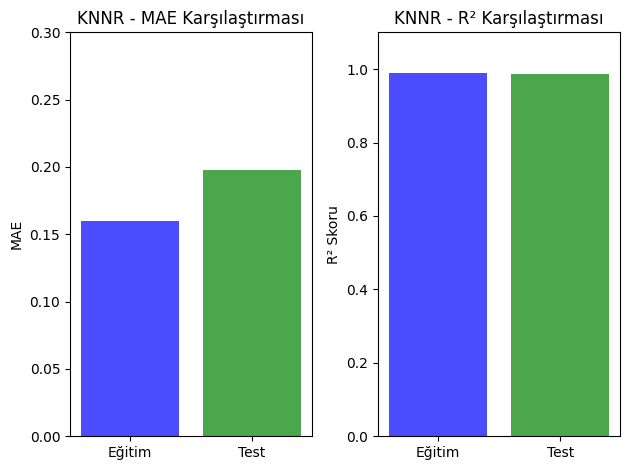

In [134]:
# MAE Grafiği
plt.subplot(1, 2, 1)
plt.bar(['Eğitim', 'Test'], [0.160, 0.198], color=['blue', 'green'], alpha=0.7)
plt.title('KNNR - MAE Karşılaştırması')
plt.ylabel('MAE')
plt.ylim(0, 0.3)

# R² Grafiği
plt.subplot(1, 2, 2)
plt.bar(['Eğitim', 'Test'], [0.990, 0.986], color=['blue', 'green'], alpha=0.7)
plt.title('KNNR - R² Karşılaştırması')
plt.ylabel('R² Skoru')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

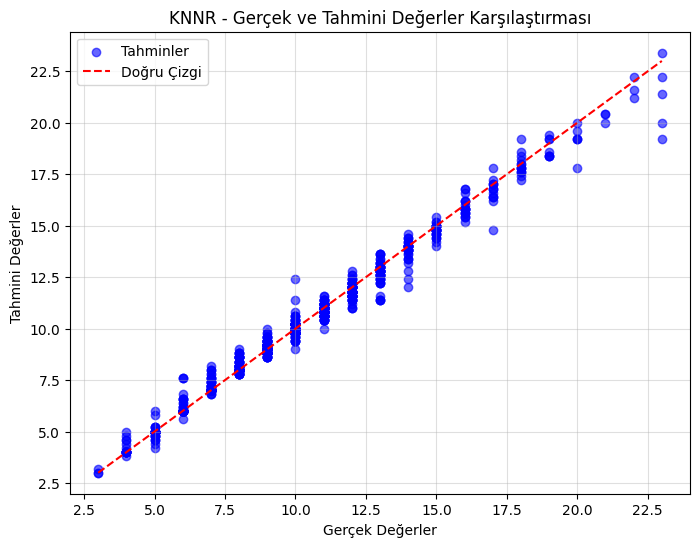

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knnr_test_predictions, color='blue', alpha=0.6, label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Doğru Çizgi')
plt.title('KNNR - Gerçek ve Tahmini Değerler Karşılaştırması')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

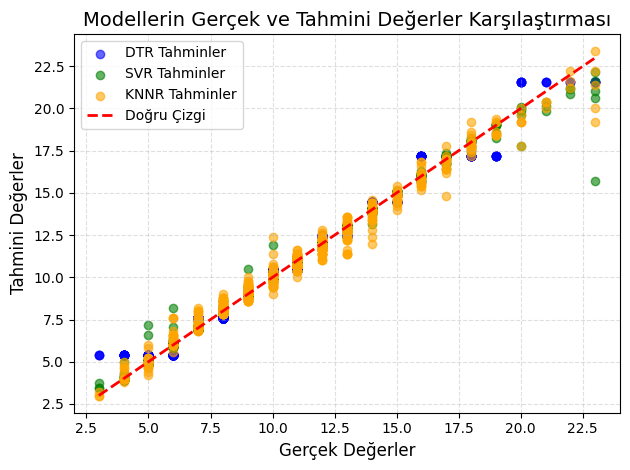

In [136]:
# Karar Ağacı Regresyonu (DTR)
plt.scatter(y_test, dtr_test_predictions, alpha=0.6, label='DTR Tahminler', color='blue')

# Destek Vektör Regresyonu (SVR)
plt.scatter(y_test, svr_test_predictions, alpha=0.6, label='SVR Tahminler', color='green')

# KNN Regresyonu (KNNR)
plt.scatter(y_test, knnr_test_predictions, alpha=0.6, label='KNNR Tahminler', color='orange')

# Doğru Çizgi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Doğru Çizgi')

# Grafik Özelleştirmeleri
plt.title('Modellerin Gerçek ve Tahmini Değerler Karşılaştırması', fontsize=14)
plt.xlabel('Gerçek Değerler', fontsize=12)
plt.ylabel('Tahmini Değerler', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()
